In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [19]:
import sys
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import plotly.express as px
import plotly.io as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
sys.path.append("../..")

In [3]:
from src.data import download_data

In [4]:
# download_data.download_all()

# Exercise #8

## 8.a

In [5]:
df = pd.read_csv("../../data/raw/college.csv")

## 8.b 
O autor sugere para retirar a coluna, eu resolvi manter, com e dar um nome para ela.
Uma observação é que nas configurações que estou usando, se você fizer um df.head() ou df na célula acima, ao tentar renomear o nome da coluna, o kernel quebra

In [6]:
df.columns.values[0] = 'College'
df.head(2)

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56


## 8.c

In [7]:
df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


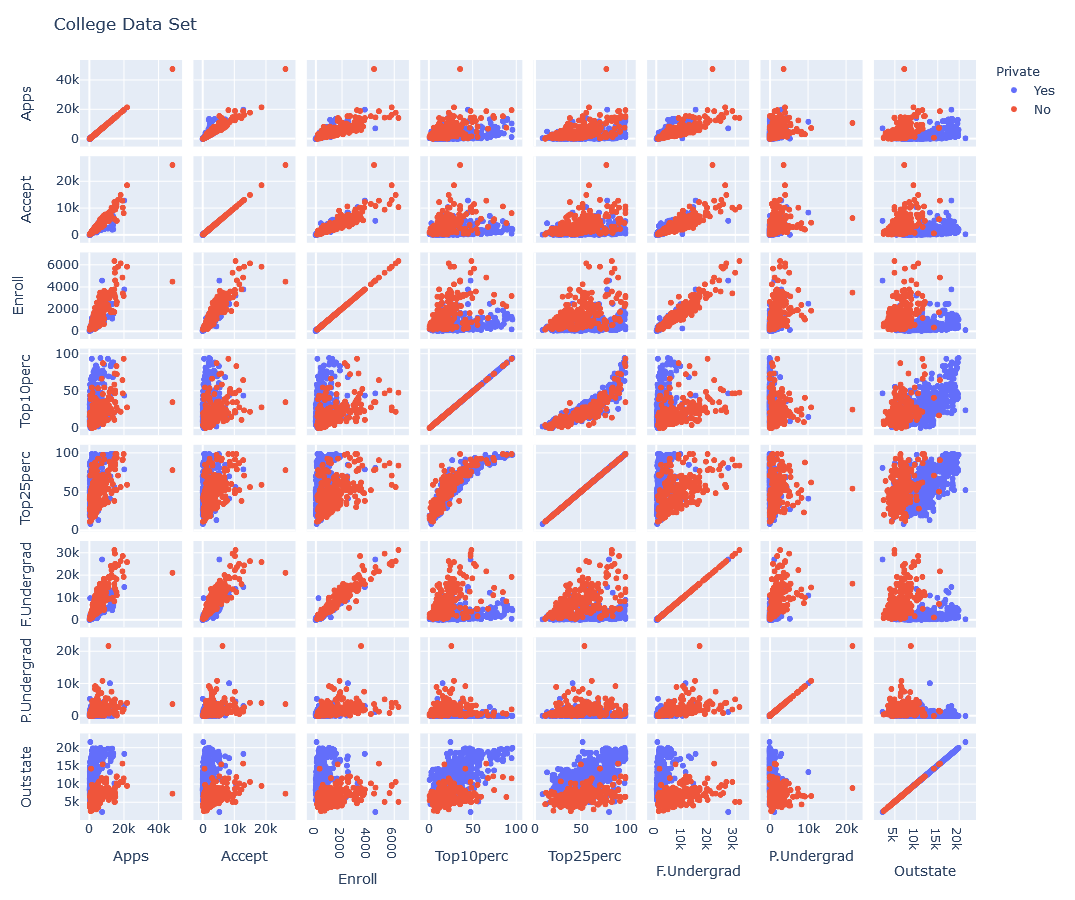

In [10]:
# fig = ff.create_scatterplotmatrix(df.iloc[:,2:10], diag='box', index='Private',
#                                   height=900, width=1200)
# fig.update_layout(title_text='hello world')
# py.show(fig)
g = px.scatter_matrix(df,
                      dimensions=df.columns[2:10],
                      color='Private')
g.update_layout(
    title='College Data Set',
    width=1200,
    height=900,
)

g.show()

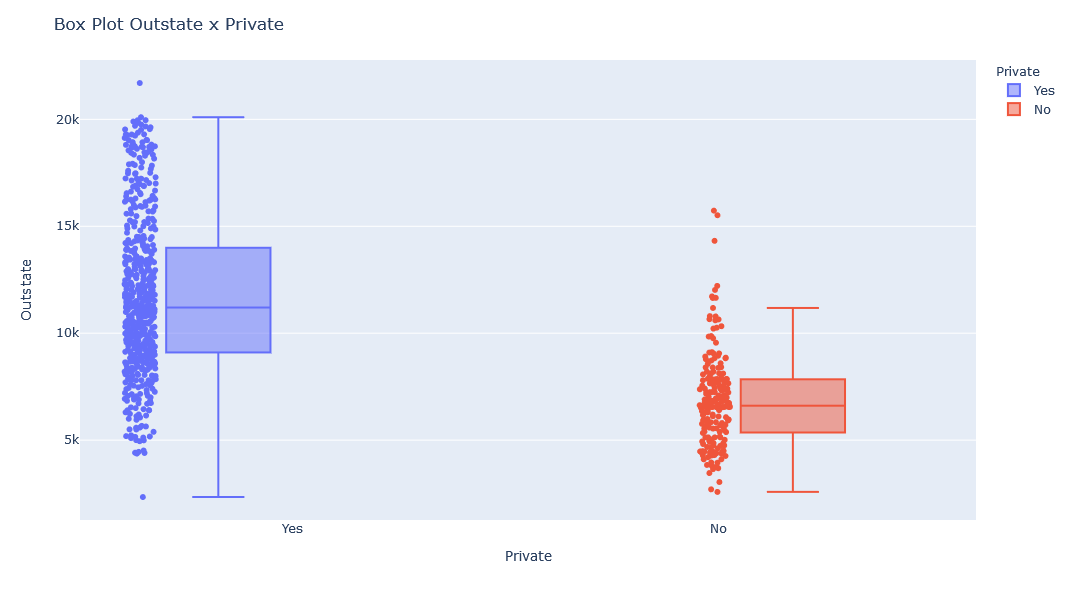

In [11]:
fig = px.box(df, x='Private', y="Outstate", color="Private", points="all")
fig.update_layout(
    title='Box Plot Outstate x Private',
    width=800,
    height=600,
)

fig.show()

In [12]:
df["Elite"] = df["Top10perc"].apply(lambda x: "Yes" if x > 50 else "No")

In [13]:
df["Elite"].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

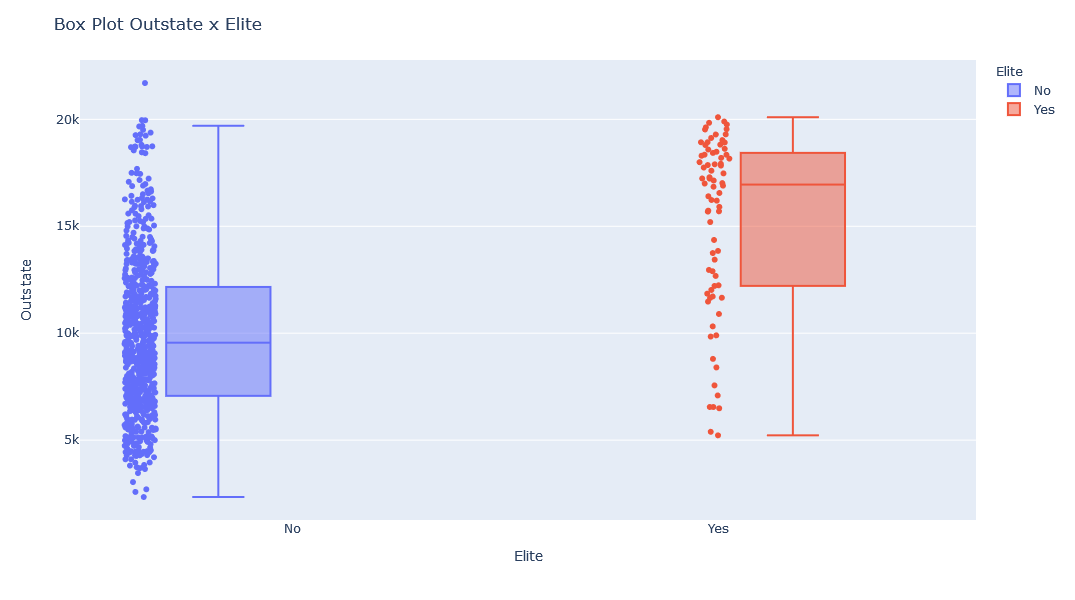

In [14]:
fig = px.box(df, x='Elite', y="Outstate", color="Elite", points="all")
fig.update_layout(
    title='Box Plot Outstate x Elite',
    width=800,
    height=600,
)

fig.show()

In [34]:
n = df.select_dtypes(include=['float64', 'int64']).shape[1]
df.select_dtypes(include=['float64', 'int64'])

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


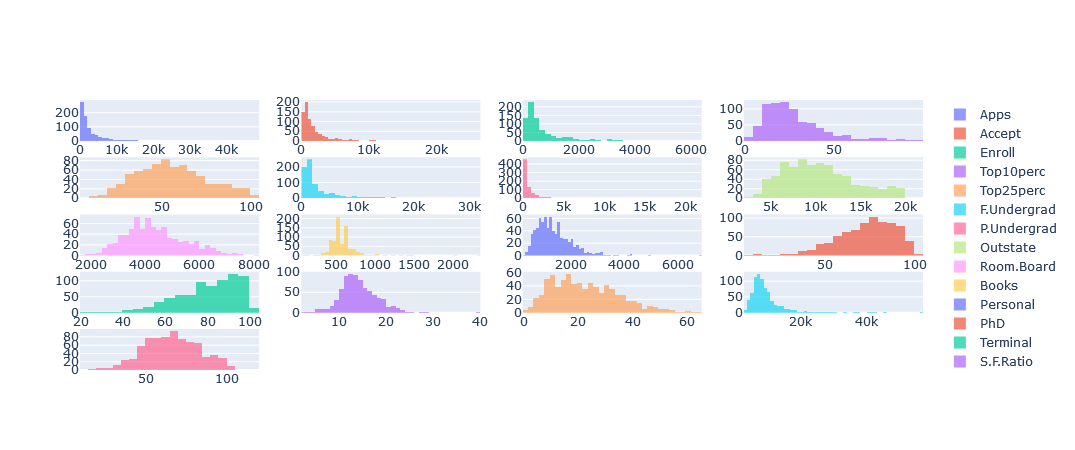

In [62]:
fig = make_subplots(rows=5, cols=4)

for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns):
    trace = go.Histogram(x = df[column].values, autobinx=True, name=column, showlegend=True, text=column, opacity=0.7)
    fig.append_trace(trace, (i//4+1), (i%4+1))

fig.show()

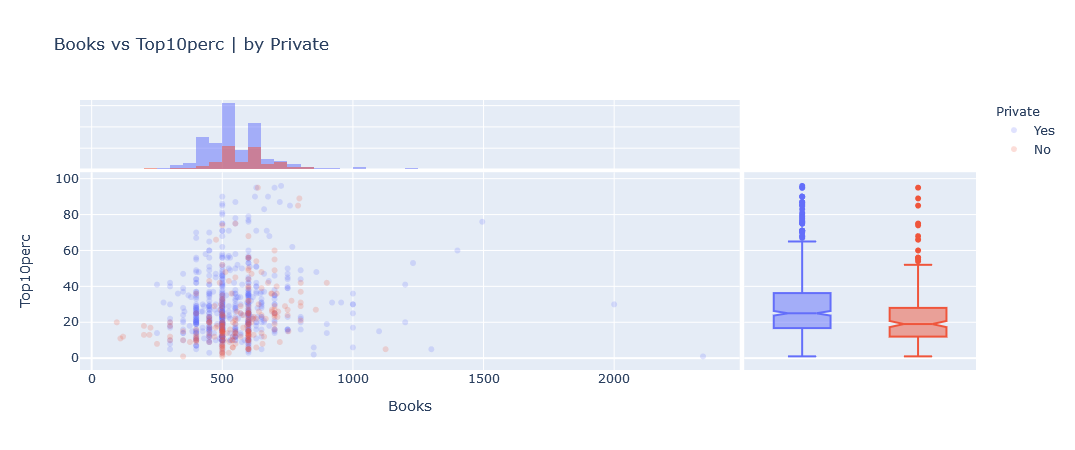

In [68]:
px.scatter(data_frame=df
           , x="Books"
           , y="Top10perc"
           , color="Private"
           , title='Books vs Top10perc | by Private'
           , marginal_x='histogram'
           , marginal_y='box'
           , hover_name='Private'
           , opacity=0.2
           , template='plotly'
          )